In [ ]:
import geopandas as gpd
import pandas as pd

def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df = gpd.read_file("../data/processed/complete_heat_risk_inputs.geojson")

df = df.rename(columns={
    "lst_mean_c": "LST",
    "ndvi_mean_1km": "NDVI",
    "Elderly Distribution": "Elderly",
    "Low-Income Households (%)": "LowIncome",
    "Population living alone (%)": "LivingAlone"
})

def safe_to_float(col):
    return pd.to_numeric(col.astype(str).str.replace('%', '').str.strip(), errors='coerce')

df["Elderly"] = safe_to_float(df["Elderly"])
df["LowIncome"] = safe_to_float(df["LowIncome"])
df["LivingAlone"] = safe_to_float(df["Population Living Alone (%)"])

df["LST_norm"] = min_max_normalize(df["LST"])
df["NDVI_inverted"] = 1 - min_max_normalize(df["NDVI"])  # More greenery = less risk
df["Elderly_norm"] = min_max_normalize(df["Elderly"])
df["LowIncome_norm"] = min_max_normalize(df["LowIncome"])
df["LivingAlone_norm"] = min_max_normalize(df["LivingAlone"])

df["HRI"] = (
    0.25 * df["LST_norm"] +
    0.20 * df["NDVI_inverted"] +
    0.20 * df["Elderly_norm"] +
    0.20 * df["LowIncome_norm"] +
    0.15 * df["LivingAlone_norm"]
)

df[[
    "Neighbourhood", "LST", "NDVI", "Elderly", "LowIncome", "LivingAlone",
    "LST_norm", "NDVI_inverted", "Elderly_norm", "LowIncome_norm", "LivingAlone_norm",
    "HRI", "geometry"
]].to_file("../data/processed/final_heat_risk_index.geojson", driver="GeoJSON")


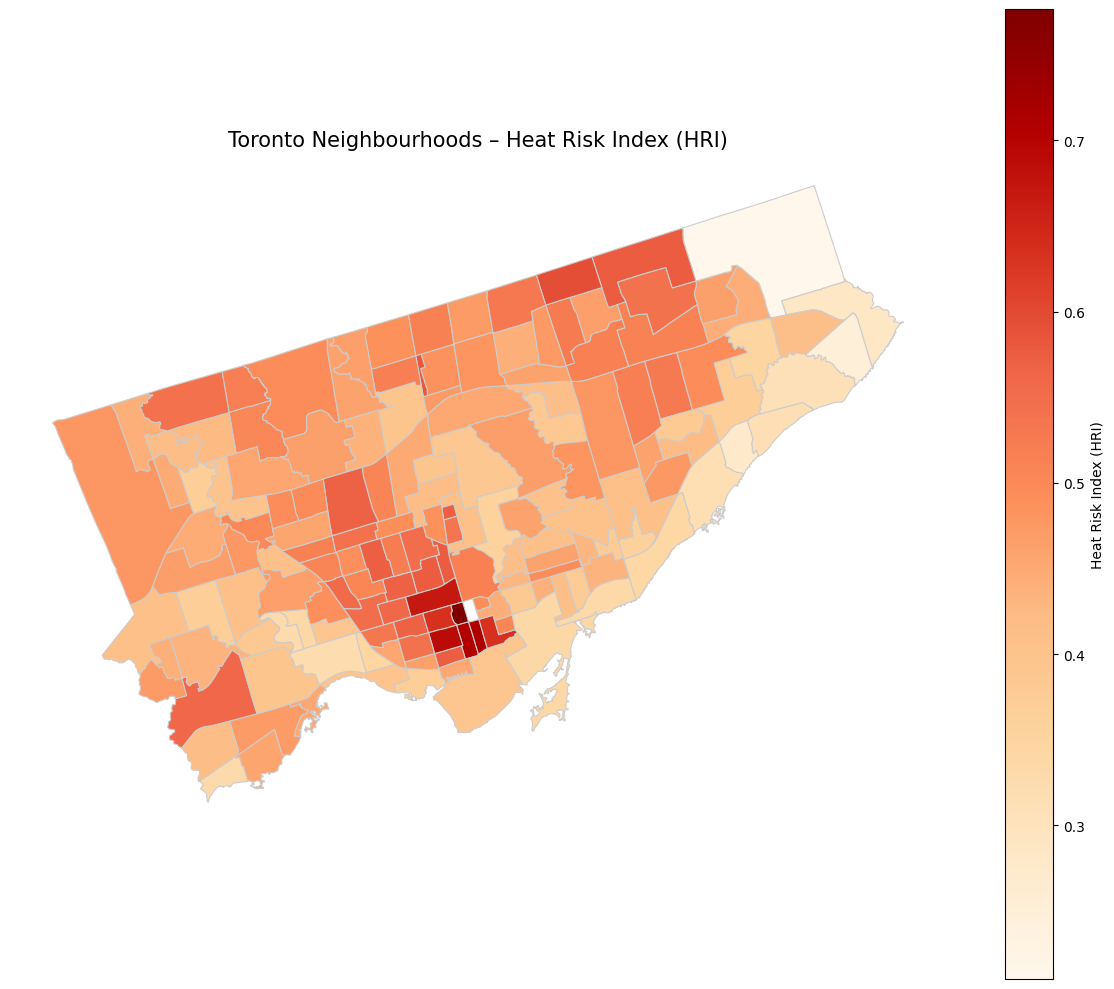

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

df.plot(column='HRI',
        cmap='OrRd',         
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': "Heat Risk Index (HRI)", 'orientation': "vertical"},
        ax=ax)

ax.set_title("Toronto Neighbourhoods – Heat Risk Index (HRI)", fontsize=15)
ax.set_axis_off()

plt.tight_layout()
plt.show()
